## Dataset Description

This dataset contains information on Pokémon, combining identification details, physical attributes, classification, and battle statistics.

| Column | Description |
|--------|-------------|
| pokedex_id | Unique identification number assigned to each Pokémon in the Pokédex |
| name | Name of the Pokémon |
| height| Height of the Pokémon |
| weight | Weight of the Pokémon |
| base_experience | Base experience points gained when the Pokémon is defeated |
| type_1 | Primary Pokémon type (e.g., Fire, Water, Grass) |
| type_2 | Secondary Pokémon type, if applicable; otherwise missing |
| hp | Hit Points, representing the Pokémon’s health |
| attack | Physical attack strength |
| defense| Physical defense capability |
| special_attack | Special attack strength |
| special_defense | Special defense capability |
| speed | Speed stat, determining turn order in battles |

The dataset supports analysis of relationships between Pokémon physical traits, type classifications, and battle performance, as well as comparisons across different Pokémon types.


## Objective of the Analysis

The objective of this analysis is to **support players in selecting suitable Pokémon for battle by examining relationships between battle statistics and primary types**. Using a bubble chart, box plot, and heatmap, the analysis explores how attack, defense, HP, and overall base stats differ across Pokémon types. These visualizations aim to reveal trade-offs between offense, defense, and survivability, helping players make informed decisions when choosing Pokémon to counter specific opponents.


## Data Overview
### First 5 Rows
The `.head()` method allows us to preview the **first five rows** of the dataset and see the column names.

In [1]:
import pandas as pd

pokemon = pd.read_csv('/Users/chowjiahui/Documents/GWU/Data Visualisation/Homework/pokemon_stats_2025.csv')

pokemon.head()

pokedex_id        name  height  weight  base_experience type_1  type_2  hp  \
0           1   Bulbasaur       7      69               64  grass  poison  45   
1           2     Ivysaur      10     130              142  grass  poison  60   
2           3    Venusaur      20    1000              236  grass  poison  80   
3           4  Charmander       6      85               62   fire     NaN  39   
4           5  Charmeleon      11     190              142   fire     NaN  58   

   attack  defense  special_attack  special_defense  speed  
0      49       49              65               65     45  
1      62       63              80               80     60  
2      82       83             100              100     80  
3      52       43              60               50     65  
4      64       58              80               65     80

### Dataset Structure

The `.info()` method provides a concise summary of the dataset, including the **data type of each column** and **non-null counts**, helping us identify missing values and data types.  

In [2]:
pokemon.info()

<class 'pandas.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   pokedex_id       250 non-null    int64
 1   name             250 non-null    str  
 2   height           250 non-null    int64
 3   weight           250 non-null    int64
 4   base_experience  250 non-null    int64
 5   type_1           250 non-null    str  
 6   type_2           115 non-null    str  
 7   hp               250 non-null    int64
 8   attack           250 non-null    int64
 9   defense          250 non-null    int64
 10  special_attack   250 non-null    int64
 11  special_defense  250 non-null    int64
 12  speed            250 non-null    int64
dtypes: int64(10), str(3)
memory usage: 25.5 KB


### Summary Statistics

The `.describe()` method provides **summary statistics** for each column, including measures like **count, mean, standard deviation, min, max**, and percentiles for numeric columns.  

In [3]:
pokemon.describe(include='all').T.head(10)

count unique        top freq     mean         std   min  \
pokedex_id       250.0    NaN        NaN  NaN    125.5   72.312977   1.0   
name               250    250  Bulbasaur    1      NaN         NaN   NaN   
height           250.0    NaN        NaN  NaN   11.844   10.117962   2.0   
weight           250.0    NaN        NaN  NaN  473.768  617.573294   1.0   
base_experience  250.0    NaN        NaN  NaN  136.244   74.252368  36.0   
type_1             250     17      water   46      NaN         NaN   NaN   
type_2             115     15     flying   38      NaN         NaN   NaN   
hp               250.0    NaN        NaN  NaN   66.776   29.779879  10.0   
attack           250.0    NaN        NaN  NaN   70.944   27.462806   5.0   
defense          250.0    NaN        NaN  NaN   68.684   30.439224   5.0   

                   25%    50%     75%     max  
pokedex_id       63.25  125.5  187.75   250.0  
name               NaN    NaN     NaN     NaN  
height             6.0   10.0    15.0    92.0  
weight            88.5  295.0  576.25  4600.0  
base_experience   65.0  142.0   175.0   608.0  
type_1             NaN    NaN     NaN     NaN  
type_2             NaN    NaN     NaN     NaN  
hp                48.5   65.0    80.0   255.0  
attack            50.0   70.0    90.0   134.0  
defense          49.25   65.0    85.0   230.0

### Checking Unique Pokémon Names

The `.unique()` method is used to extract a list of all **distinct Pokémon names** in the dataset. This helps verify that each Pokémon is uniquely represented and allows detection of any duplicate or inconsistent name entries. 

In [4]:
pokemon['name'].unique()

<StringArray>
[ 'Bulbasaur',    'Ivysaur',   'Venusaur', 'Charmander', 'Charmeleon',
  'Charizard',   'Squirtle',  'Wartortle',  'Blastoise',   'Caterpie',
 ...
    'Miltank',    'Blissey',     'Raikou',      'Entei',    'Suicune',
   'Larvitar',    'Pupitar',  'Tyranitar',      'Lugia',      'Ho-oh']
Length: 250, dtype: str

## Exploratory Data Analysis
### Bubble Chart: Attack vs Defense by Pokémon Type

The bubble chart helps players evaluate Pokémon based on their **offensive and defensive balance**. Attack and Defense are encoded on the x- and y-axes, while bubble size represents **HP**, indicating survivability, and color shows the **primary type**. This visualization allows players to identify Pokémon that suit different playstyles, such as high-attack glass cannons, defensive tanks, or well-balanced fighters with large HP pools. By observing where Pokémon cluster, players can make more informed choices depending on whether they prefer aggressive or durable battle strategies.  

**Limitation:** Overlapping bubbles and the large number of types make individual Pokémon harder to distinguish in dense regions.


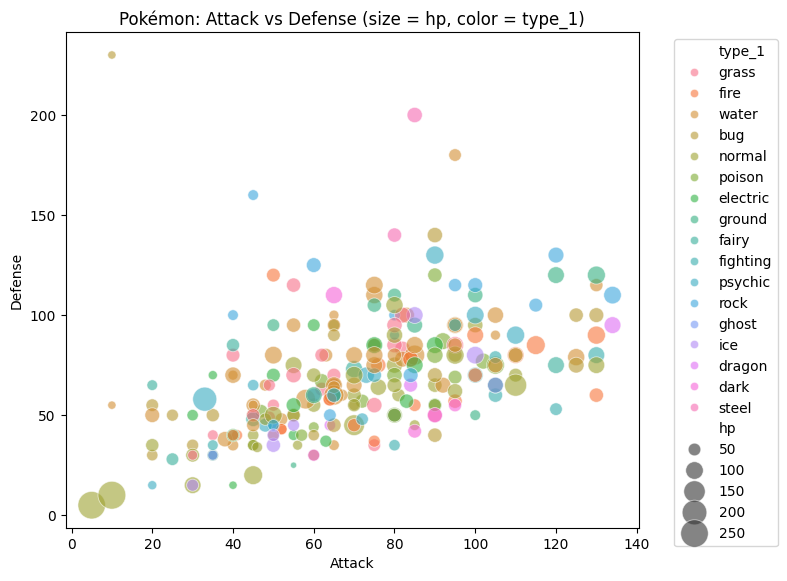

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplotv(
    x="attack", y="defense",
    size="hp", hue="type_1",
    data=pokemon,
    sizes=(20, 400), alpha=0.6
)

plt.title("Pokémon: Attack vs Defense (size = hp, color = type_1)")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Box Plot: Total Base Stats by Primary Type

The box plot helps players compare Pokémon types based on **overall battle strength**, measured by total base stats. By grouping Pokémon by primary type on the x-axis and showing the distribution of total stats on the y-axis, the chart allows players to identify types that generally offer stronger or more consistent performance. Types with higher medians suggest safer choices for overall power, while wider spreads indicate greater risk–reward, where a type may include both weak and exceptionally strong Pokémon. 

**Limitation:** Aggregating all battle stats into a single total hides individual strengths, such as whether a Pokémon excels in speed, offense, or defense.


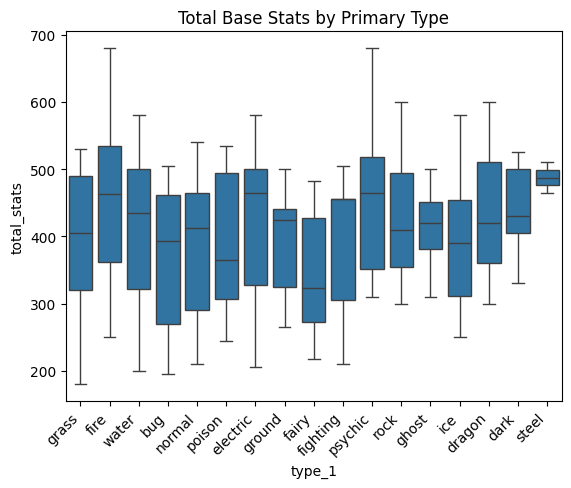

In [11]:
pokemon["total_stats"] = (
    pokemon["hp"] + pokemon["attack"] + pokemon["defense"] +
    pokemon["special_attack"] + pokemon["special_defense"] + pokemon["speed"]
)

sns.boxplot(x="type_1", y="total_stats", data=pokemon)
plt.title("Total Base Stats by Primary Type")
plt.xticks(rotation=45, ha="right")
plt.show()

### Heatmap: Average Pokémon Battle Stats by Primary Type

The heatmap summarizes the **average battle stats** of Pokémon across primary types, with color intensity encoding the magnitude of each stat. By comparing rows (types) and columns (stats), players can quickly identify which types specialize in offense, defense, speed, or balanced performance. This visualization supports informed Pokémon selection by highlighting type-level strengths, such as types that excel in special attack or those that prioritize defensive durability.  

**Limitation:** Averaging stats masks variation within each type and may hide exceptional Pokémon that differ significantly from the type average.

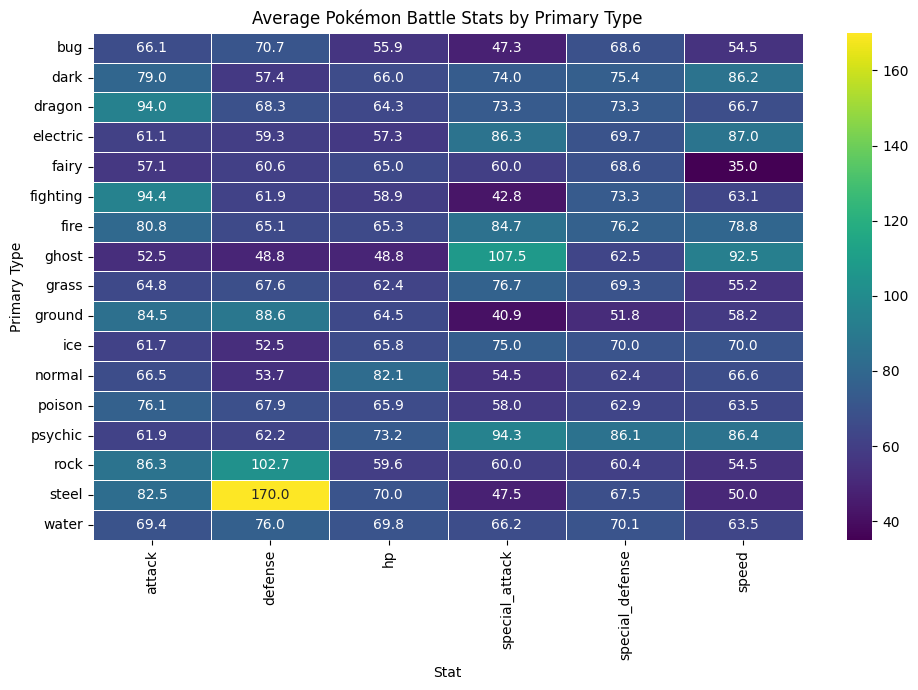

In [14]:
stats = ["hp", "attack", "defense", "special_attack", "special_defense", "speed"]

# Compute average stats by primary type
type_stats = (
    pokemon
    .groupby("type_1")[stats]
    .mean()
    .reset_index()
)

# Reshape to long format for easier plotting if needed
type_stats_long = type_stats.melt(
    id_vars="type_1",
    value_vars=stats,
    var_name="Stat",
    value_name="Average"
)

# Pivot back for heatmap
heatmap_data = type_stats_long.pivot(
    index="type_1", columns="Stat", values="Average"
)

plt.figure(figsize=(10, 7))
sns.heatmap(
    heatmap_data,
    cmap="viridis",
    annot=True, fmt=".1f",
    linewidths=0.5
)

plt.title("Average Pokémon Battle Stats by Primary Type")
plt.xlabel("Stat")
plt.ylabel("Primary Type")
plt.tight_layout()
plt.show()

## Conclusion

The visual analysis provides clear guidance for choosing Pokémon in different battle situations. The bubble chart shows that Pokémon with balanced attack, defense, and high HP are the most reliable choices for general encounters, while extreme attackers may be powerful but more vulnerable. The box plot reveals that certain types, such as Dragon, Steel, and Psychic, tend to have higher total base stats, making them strong all-round options when players need a dependable lead Pokémon.  

The heatmap further explains these patterns by showing type-specific strengths. For example, Steel and Rock types excel in defense, making them effective against high-attack opponents, while Electric and Psychic types show strong special attack and speed, suiting fast, offensive strategies. Therefore, when facing a physically strong opponent, players should consider defensive types like Steel or Rock, whereas against slower or bulky opponents, fast special attackers such as Electric or Psychic types are preferable. Overall, selecting Pokémon based on type strengths and stat balance can significantly improve battle success.
